In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, poisson

In /home/tylerlum/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/tylerlum/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/tylerlum/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/tylerlum/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/tylerlum/.local/lib/python3.6/site-packages/matplotlib/

In [2]:
# Constants from the question
probability_miss_flight = 0.07
num_seats = 500
num_booked_passengers = 525
extra_passengers = num_booked_passengers - num_seats

## Question 5.a

The probability that the flight in question is overbooked is 0.014067102732306875

In [3]:
# Calculate binomial cdf
possible_number_passengers = np.arange(0, num_booked_passengers + 1) # 0, 1, ..., num_booked_passengers
binom_cdf = binom.cdf(k=possible_number_passengers, n=num_booked_passengers, p=probability_miss_flight)

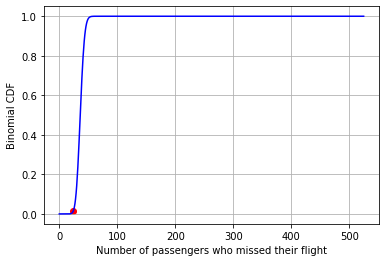

In [4]:
# Plot binomial cdf
plt.plot(possible_number_passengers, binom_cdf, color='b')
plt.scatter([extra_passengers - 1], binom_cdf[extra_passengers - 1], color='r')
plt.xlabel('Number of passengers who missed their flight')
plt.ylabel('Binomial CDF')
plt.grid()

In [5]:
# Calculate likelihood of overbooking
# If X == extra_passengers, no overbookings.
# Likelihood of overbooking = P(X < extra_passengers) = P(X <= extra_passengers - 1) = cdf(extra_passengers - 1)
binom_likelihood_of_overbooking = binom_cdf[extra_passengers - 1]
print(f"binom_likelihood_of_overbooking = {binom_likelihood_of_overbooking}")

binom_likelihood_of_overbooking = 0.014067102732306875


## Question 5.b

Using the poisson approximation, the approximate probability that the flight in question is overbooked is 0.01688480901099353.

In [6]:
# Calculate binomial cdf
poisson_cdf = poisson.cdf(k=possible_number_passengers, mu=num_booked_passengers*probability_miss_flight)

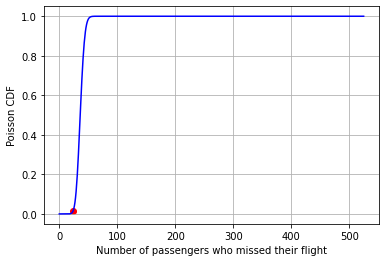

In [7]:
# Plot poisson cdf
plt.plot(possible_number_passengers, poisson_cdf, color='b')
plt.scatter([extra_passengers - 1], poisson_cdf[extra_passengers - 1], color='r')
plt.xlabel('Number of passengers who missed their flight')
plt.ylabel('Poisson CDF')
plt.grid()

In [8]:
# Calculate likelihood of overbooking
# If X == extra_passengers, no overbookings.
# Likelihood of overbooking = P(X < extra_passengers) = P(X <= extra_passengers - 1) = cdf(extra_passengers - 1)
poisson_likelihood_of_overbooking = poisson_cdf[extra_passengers - 1]
print(f"poisson_likelihood_of_overbooking = {poisson_likelihood_of_overbooking}")

poisson_likelihood_of_overbooking = 0.01688480901099353


## Question 5.c

From 40,000 simulations, the proportion of times which the airline overbooks the flight is 0.014675.

In [9]:
# Perform simulations
num_simulations = 40000
simulations = np.random.random((num_simulations, num_booked_passengers))
simulated_no_shows = np.where(simulations < probability_miss_flight, 1, 0)
print(f"simulated_no_shows.shape = {simulated_no_shows.shape}")

simulated_no_shows.shape = (40000, 525)


In [10]:
# Count no shows
simulated_num_no_shows = simulated_no_shows.sum(axis=1)
print(f"simulated_num_no_shows.shape = {simulated_num_no_shows.shape}")

simulated_num_no_shows.shape = (40000,)


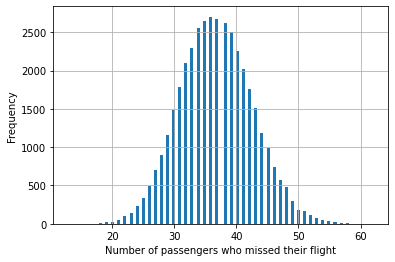

In [11]:
# Plot histogram of number of no shows
plt.hist(simulated_num_no_shows, bins=100)
plt.xlabel("Number of passengers who missed their flight")
plt.ylabel("Frequency")
plt.grid()

In [12]:
# Calculate number of simulations resulting in overbooking
simulated_overbookings = np.where(simulated_num_no_shows < extra_passengers, 1, 0)
num_overbookings = simulated_overbookings.sum()
print(f"num_overbookings = {num_overbookings}")

num_overbookings = 587


In [13]:
# Calculate proportion of simulations resulting in overbooking
proportion_overbookings = num_overbookings / num_simulations
print(f"proportion_overbookings = {proportion_overbookings}")

proportion_overbookings = 0.014675


## Question 5.d

As n gets large, the running proportion of overbookings in the first n simulated bookings stabilizes at about 0.14675, as expected.

In [14]:
# Calculate O_n
O = np.zeros((num_simulations + 1))
for n in range(1, num_simulations + 1):
    O[n] = O[n-1] + simulated_overbookings[n-1]

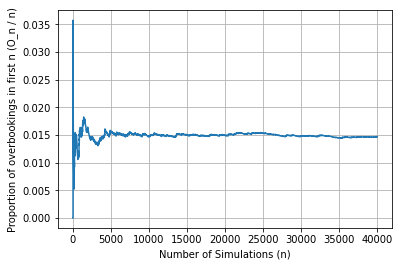

In [15]:
# Plot O_n / n vs. n
plt.plot(np.arange(num_simulations + 1) + 1, O / (np.arange(num_simulations + 1) + 1))
plt.xlabel('Number of Simulations (n)')
plt.ylabel('Proportion of overbookings in first n (O_n / n)')
plt.grid()